## Google Landmark Recognition 2021

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

Load training data

In [7]:
train_data = pd.read_csv('train.csv')

In [8]:
train_data.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


Total number of unique landmarks:

In [9]:
len(train_data['landmark_id'].unique())

81313

In [14]:
train_data['landmark_id'].value_counts()

138982    6272
126637    2231
20409     1758
83144     1741
113209    1135
          ... 
180503       2
179834       2
183115       2
63266        2
197219       2
Name: landmark_id, Length: 81313, dtype: int64

In [10]:
def plot_examples(landmark_id=1):
    '''plot 5 examples of images with the same landmark_id'''
    
    fig, ax = plt.subplots(1,5, figsize=(25,12))
    ax = ax.ravel()
    for i in range(5):
        idx = train_data[train_data['landmark_id']==landmark_id].index[i]
        image_id = train_data.loc[idx, 'id']
        file = image_id + '.jpg'
        subpath = '/'.join([char for char in image_id[0:3]])
        img = cv2.imread('train/'+subpath+'/'+file)
        ax[i].imshow(img)
        ax[i].set_title('landmark_id:' + str(landmark_id))
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
        print('train/'+subpath+'/'+file)

train/0/0/4/004d531bd0f43001.jpg
train/0/0/8/00817c48cc418bf3.jpg
train/0/0/b/00b6e3050572f46f.jpg
train/0/0/c/00cd3cd816e56e2b.jpg
train/0/1/2/01294d171c6a5a99.jpg


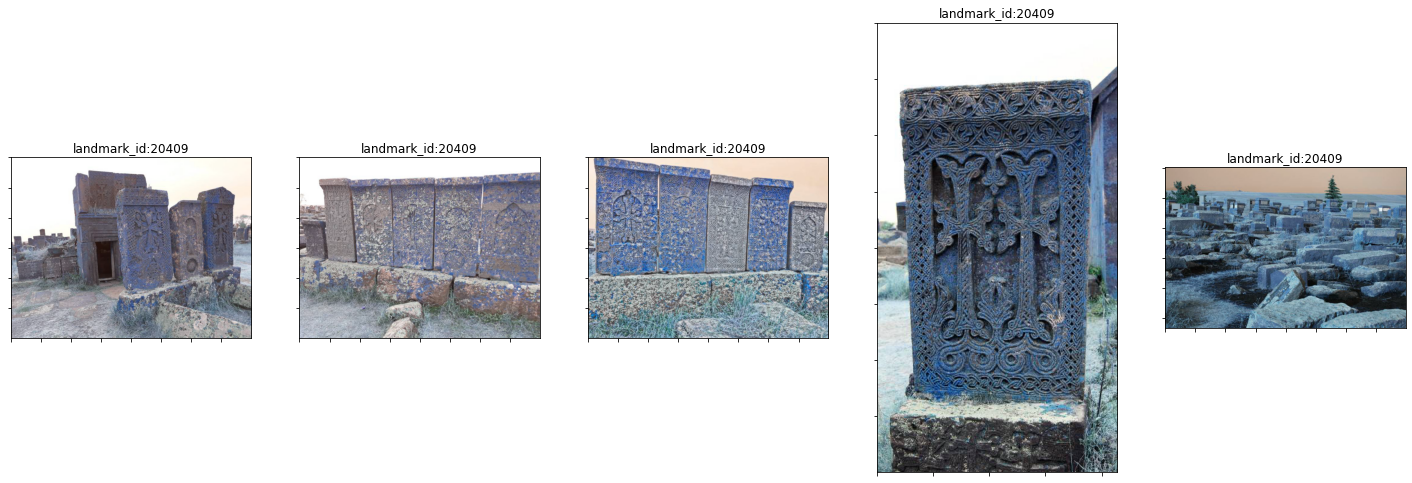

In [16]:
plot_examples(landmark_id=20409)

In [ ]:
x = 

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Flatten, Input

In [19]:
base_model = ResNet50(pooling=max, include_top=False)
input = Input(shape=(100,100,3), name = 'image_input')
x = base_model(input)
x = Flatten()(x)

model = Model(inputs=input, outputs = x)